In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from difflib import SequenceMatcher

def similarity(a, b):
    if a is None or b is None:
        return 0
    return SequenceMatcher(None, str(a), str(b)).ratio()

## Load Datasets

In [3]:
df = pd.read_csv("s3://amos-training-data/100k_historic_enriched.csv")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:272: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [4]:
#df_10k = pd.read_csv("s3://amos-training-data/10k_historic_enriched_with_regionalatlas.csv", index_col="Unnamed: 0")
#df_1k = pd.read_csv("s3://amos-training-data/historic_enriched.csv")
#df_1k.info()

In [5]:
df.head()

Last Name First Name         Account Owner           Phone  \
0      Gall   Giannina        Felix Knoedler   +491742433911   
1   Harbort     Yvonne  Direct Registrations  +4916096836015   
2      DINH  Tuan Ngoc              MuleSoft             NaN   
3     Semiz      Oemer        Felix Knoedler   +491743028843   
4     Ahmad     Naseer  Direct Registrations  +4915122232319   

                       Email                    Company Name  \
0       podologiegall@web.de   Fachpraxis für Podologie Gall   
1             yhammes@web.de  Prowin Beratung Yvonne Harbort   
2  info.soyhamburg@gmail.com                SOY Hamburg GmbH   
3   info@trattoria-nobile.de                Trattoria Nobile   
4     naseer@augsburgtaxi.de        Naseer Ahmad Taxibetrieb   

           MCC Level MerchantSizeByDPV               domain  email_valid  ...  \
0   Medical Services                XS                  NaN         True  ...   
1         Consulting                XS                  NaN         True  ...   
2  Café / Restaurant                 L                  NaN         True  ...   
3     Food / Grocery                 M  trattoria-nobile.de         True  ...   
4        Taxi / Limo                XS      augsburgtaxi.de         True  ...   

   regional_atlas_investments_p_employee  \
0                           6.700000e+00   
1                                    NaN   
2                           7.200000e+00   
3                           5.555556e+09   
4                           4.500000e+00   

   regional_atlas_gross_salary_p_employee  \
0                                    59.1   
1                                     NaN   
2                                    52.3   
3                                    83.7   
4                                    63.0   

  regional_atlas_disp_income_p_inhabitant  \
0                                 23511.0   
1                                     NaN   
2                                 25813.0   
3                                 26503.0   
4                                 21173.0   

  regional_atlas_tot_income_p_taxpayer regional_atlas_gdp_p_employee  \
0                                 41.2                       81571.0   
1                                  NaN                           NaN   
2                                 45.6                       75449.0   
3                                 51.2                      103237.0   
4                                 38.9                       75289.0   

   regional_atlas_gdp_development  regional_atlas_gdp_p_inhabitant  \
0                             3.4                          62997.0   
1                             NaN                              NaN   
2                             5.6                          31494.0   
3                             3.5                          87513.0   
4                             2.2                          49771.0   

  regional_atlas_gdp_p_workhours regional_atlas_pop_avg_age_zensus  \
0                           58.7                              43.1   
1                            NaN                               NaN   
2                           52.1                              43.6   
3                           74.8                              41.4   
4                           55.9                              42.6   

  regional_atlas_regional_score  
0                   4385.250325  
1                           NaN  
2                    815.155955  
3                   4987.589234  
4                   2735.754861  

[5 rows x 54 columns]

In [6]:
historic_df = pd.read_csv("s3://amos-training-data/AMOS export historic data Dec 6, 23.csv")

In [7]:
#df_90k = pd.read_csv("s3://amos-training-data/90k_historic_enriched.csv", index_col="Unnamed: 0")

### Merge 90k and 10k enriched samples

In [8]:
# df = pd.concat([df_10k, df_90k])

In [9]:
# df.info()

In [10]:
# df.to_csv("s3://amos-training-data/100k_historic_enriched.csv", index=False)

## Create representative dataset

In [11]:
classes = ["XS", "S", "M", "L", "XL"]
# sample_10k = historic_df.sample(n=10000)
# sample_1k = historic_df.sample(n=10000)


In [12]:
# excluded_indices = df['Unnamed: 0']
# sample_90k = historic_df.drop(index=excluded_indices)

In [13]:
# sample_90k.to_csv("s3://amos-training-data/90k_historic_sample.csv")
# sample_10k.to_csv("s3://amos-training-data/10k_historic_sample.csv")
# sample_1k.to_csv("s3://amos-training-data/1k_historic_sample.csv")

## Data exploration (historic)

In [14]:
historic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101712 entries, 0 to 101711
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Last Name          101712 non-null  object
 1   First Name         101712 non-null  object
 2   Account Owner      101712 non-null  object
 3   Phone              99330 non-null   object
 4   Email              101712 non-null  object
 5   Company Name       101711 non-null  object
 6   MCC Level          101712 non-null  object
 7   MerchantSizeByDPV  101712 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


### Distribution of 'MCC Level'

<Axes: >

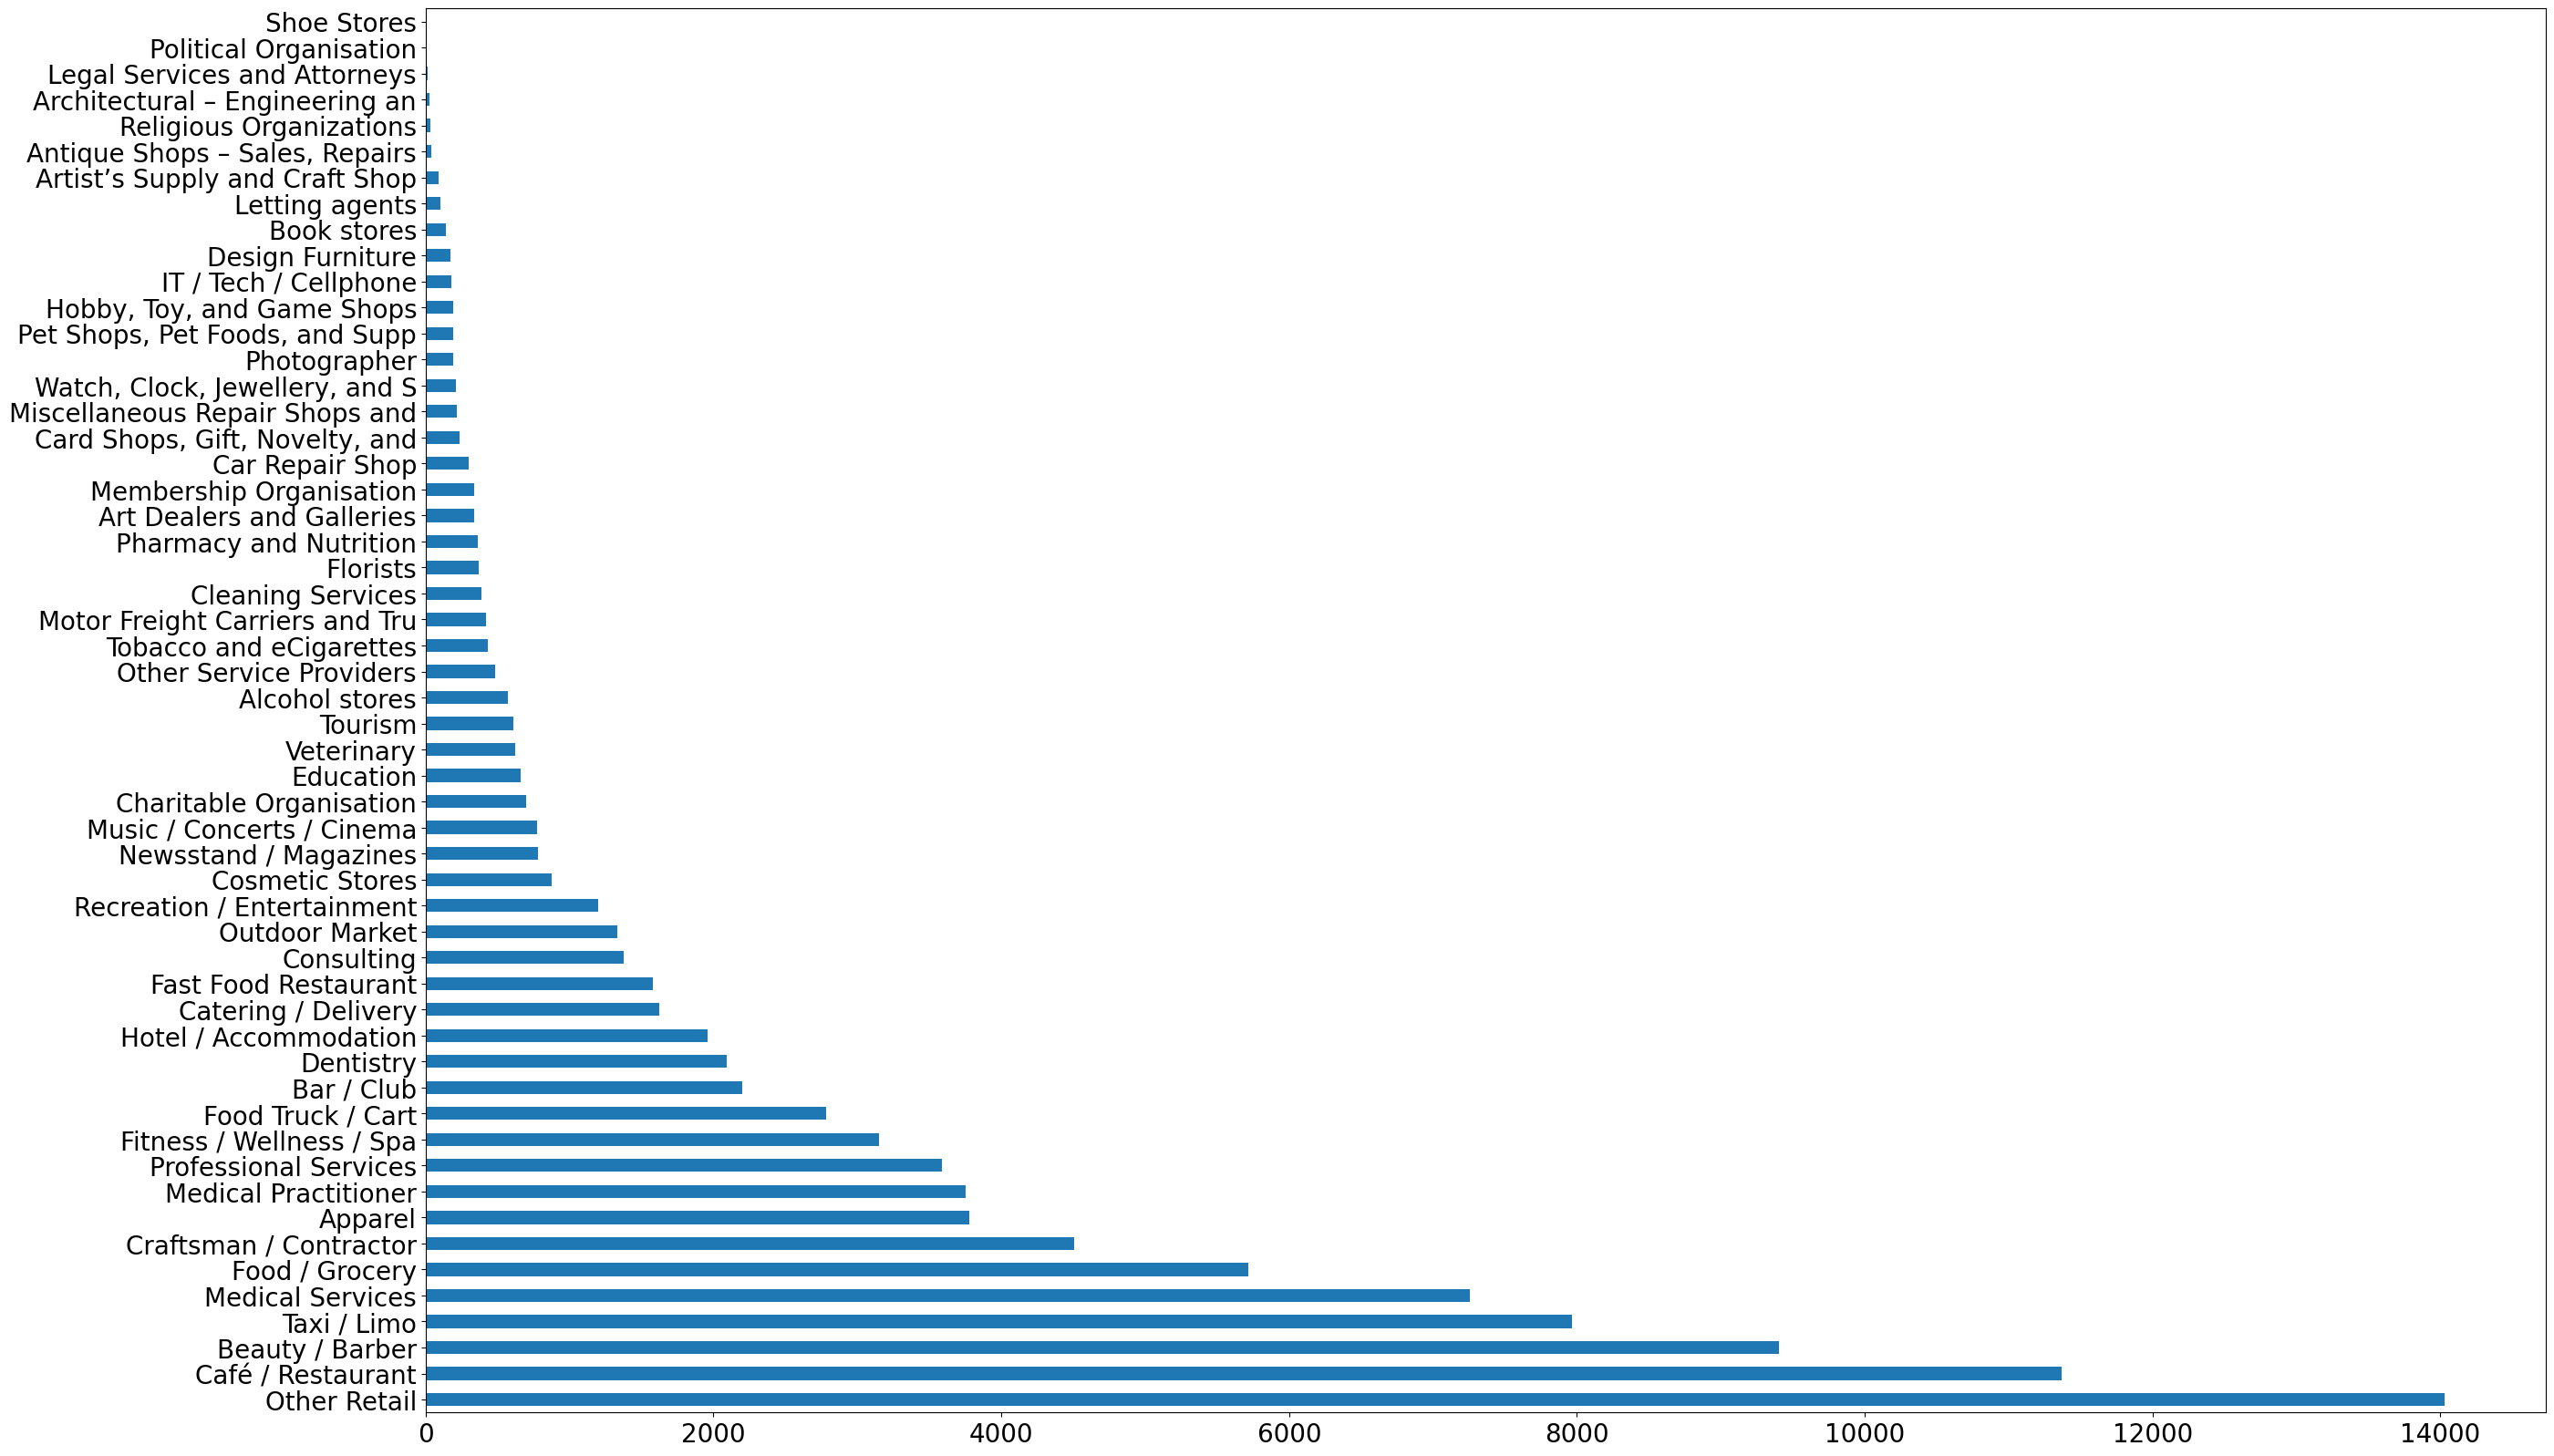

In [15]:
mcc_count = historic_df.value_counts('MCC Level', ascending=False)

mcc_count.index = map(lambda x: x[:30], mcc_count.index)

mcc_count.plot(kind='barh', figsize = (30,20), fontsize=20)

### Distribution of 'Merchant size'

<Axes: xlabel='MerchantSizeByDPV'>

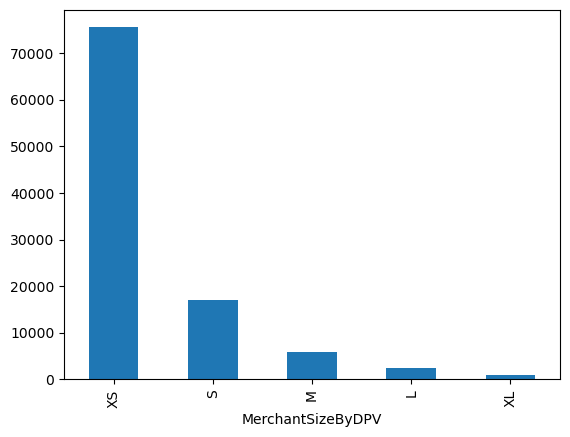

In [16]:
ms_count = historic_df.value_counts('MerchantSizeByDPV', ascending=False)

ms_count.plot(kind='bar')

## Data Exploration (enriched)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101712 entries, 0 to 101711
Data columns (total 54 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Last Name                                    101712 non-null  object 
 1   First Name                                   101712 non-null  object 
 2   Account Owner                                101712 non-null  object 
 3   Phone                                        99330 non-null   object 
 4   Email                                        101712 non-null  object 
 5   Company Name                                 101711 non-null  object 
 6   MCC Level                                    101712 non-null  object 
 7   MerchantSizeByDPV                            101712 non-null  object 
 8   domain                                       44587 non-null   object 
 9   email_valid                                  101712 non-nul

### Confidence in Google results

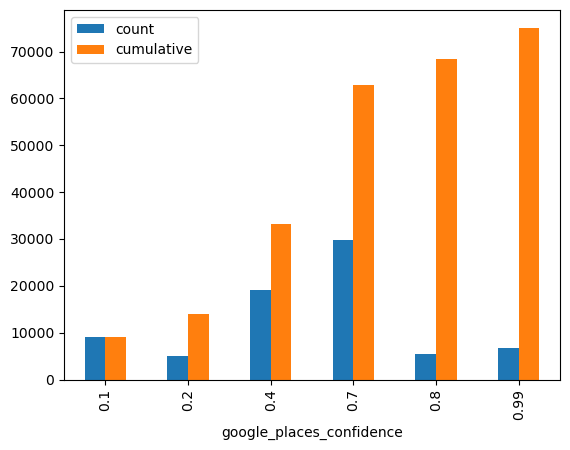

In [18]:
conf_count = df.value_counts('google_places_confidence', sort=False)
conf_count = pd.DataFrame({'count': conf_count, 'cumulative': conf_count.cumsum()}, index = conf_count.index)
conf_count.plot(kind="bar")
plt.show()

### Distribution of 'business_name_similarity'

In [19]:
#df = df.dropna()

sim = df.apply(lambda lead: similarity(lead['Company Name'], lead['google_places_name']), axis=1)
sim
df['business_name_similarity'] = sim

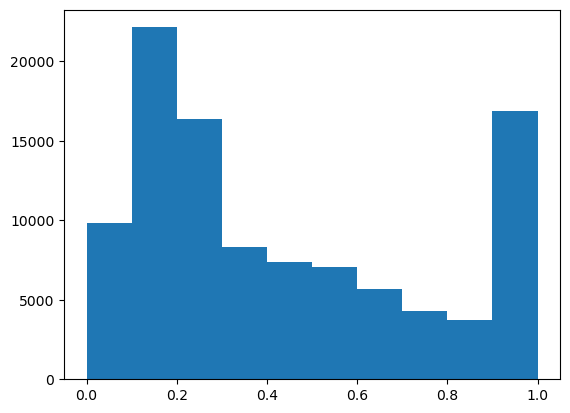

In [20]:
plt.hist(df['business_name_similarity'])
plt.show()

### Correlation between "business name similarity" and confidence in results?

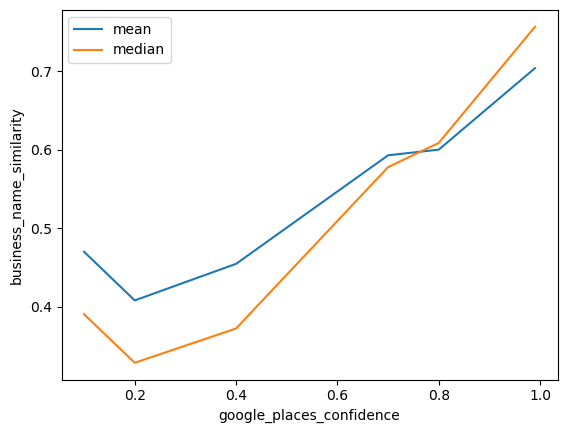

In [21]:
df_conf = df.groupby(['google_places_confidence']).agg(
    mean=pd.NamedAgg(column="business_name_similarity", aggfunc="mean"),
    median=pd.NamedAgg(column="business_name_similarity", aggfunc="median"),
)
df_conf.plot(kind='line', ylabel='business_name_similarity')
plt.show()

### Comparision of company name and Google business name (confidence >= 0.8)

In [22]:
df[df['google_places_confidence']>= 0.8][['domain', 'Company Name', 'google_places_name', 'google_places_confidence', 'business_name_similarity']].head(20)

domain                            Company Name  \
25                  NaN                            Bakky's Bäck   
29                  NaN                           Aviation Talk   
33                  NaN                Hofladen Grebenstein GbR   
34                  NaN                           LEVEL & BRAVE   
38          beachwax.de              Beach Wax Brazilian Waxing   
53                  NaN                                TENDENZA   
65       kaya-salate.de                     Kaya die gute Küche   
71                  NaN                              Barberbude   
96   zeitlos-detmold.de                         zeitlos detmold   
128                 NaN                        Jules Fellhuette   
130                 NaN                                  Schura   
132                 NaN                          Frank Ketelsen   
134                 NaN  Sabine Daschmann Hofstüberl Wolferborn   
147                 NaN                 Bella Bellissima Beauty   
160                 NaN                             ASIA IMBISS   
229                 NaN                          MARIEL PASTELL   
233  babettebeckmann.de                Babette Beckmann Taschen   
237                 NaN                         Fußpflege Gehle   
244                 NaN                      Libanesische Zeder   
246                 NaN                            Fade Station   

                                    google_places_name  \
25   Bekkys Bäck - Ελληνικό Ζαχαροπλαστείο Café, Ku...   
29                  ICAO Language Testing Organisation   
33                            Hofladen Grebenstein GbR   
34                      LEVEL & BRAVE - Masterstylists   
38                          Beach Wax Brazilian Waxing   
53                          TENDENZA Top Mode Boutique   
65                                         Kaya Salate   
71                                          Barberbude   
96                                     zeitlos detmold   
128                        Hundesalon Jules Fellhuette   
130                               SCHURA beautécultûre   
132                                Schutzdeckenshop.de   
134                              Hofstüberl Wolferborn   
147                            Bella Bellissima Beauty   
160                      VĂN PHÒNG LUẬT RELIDE TẠI ĐỨC   
229                                      Mariel Pastel   
233                           Babette Beckmann Taschen   
237                              Fußpflegestudio Gehle   
244                      Libanesische Zeder ارزة لبنان   
246                                       Fade Station   

     google_places_confidence  business_name_similarity  
25                       0.80                  0.285714  
29                       0.80                  0.297872  
33                       0.99                  1.000000  
34                       0.99                  0.604651  
38                       0.99                  1.000000  
53                       0.80                  0.470588  
65                       0.99                  0.466667  
71                       0.80                  1.000000  
96                       0.99                  1.000000  
128                      0.99                  0.744186  
130                      0.80                  0.307692  
132                      0.80                  0.181818  
134                      0.99                  0.711864  
147                      0.80                  1.000000  
160                      0.80                  0.150000  
229                      0.80                  0.222222  
233                      0.99                  1.000000  
237                      0.99                  0.833333  
244                      0.80                  0.765957  
246                      0.80                  1.000000

### Comparision of company name and Google business name (confidence < 0.5)

In [23]:
df[df['google_places_confidence']<0.5][['domain', 'Company Name', 'google_places_name', 'google_places_confidence', 'business_name_similarity']].head(20)

domain                                       Company Name  \
0                   NaN                      Fachpraxis für Podologie Gall   
2                   NaN                                   SOY Hamburg GmbH   
3   trattoria-nobile.de                                   Trattoria Nobile   
9                   NaN                                          MYTH GmbH   
10                  NaN                                           Soy GmbH   
12      baeren-treff.de                            Bären-Treff Eckernförde   
17                  NaN                          Autoservice Detlef Örtwig   
19                  NaN                                           Dshamila   
28                  NaN                                          My Beauty   
31                  NaN             traettinobelluco gbr - Eiscafé Venezia   
36                  NaN                                             Praxis   
44                  NaN                                         Polisano's   
45                  NaN                              mister-needles tattoo   
47                  NaN                  Radsporthaus Boos Fahrradgeschäft   
48     newmens-kiosk.de                            Newmen‘s Kiosk and More   
49                  NaN  Kammerzelt Café und Handelsgesellschaft UG (ha...   
50                  NaN                                  KaSie Nails Trier   
52                  NaN                        SpVg. Badorf-Pingsdorf e.V.   
56                  NaN                                  Katarzyna Schmidt   
59                  NaN                                  Praxis Dr. Uecker   

                                   google_places_name  \
0   Fuss Vital Praxis für Podologie/Med. Fußpflege...   
2                               SOY Hamburg Eppendorf   
3                                    Trattoria Nobile   
9        Dr. med. Dr. med. dent. Hakan Tastan Impadia   
10                                  Taxi Unterföhring   
12                                        Bären-Treff   
17  Kanzlei Oertwig Rechtsanwälte in Bürogemeinschaft   
19                                    Wolfgang Heckel   
28                                         SEKIZ e.V.   
31                                            Venedig   
36           Kärwaburschen und -Madli Tuchenbach e.V.   
44                                  Polisano's Rodgau   
45                                           BrotZeit   
47                                  Radsporthaus Boos   
48                                      Newseum Store   
49                                       Café Brettle   
50                               Der Hofladen Siebald   
52                     Spielvereinigung Nürnberg e.V.   
56                                           Księżpol   
59                             Dr. med. Miriam Uecker   

    google_places_confidence  business_name_similarity  
0                        0.4                  0.489362  
2                        0.4                  0.648649  
3                        0.2                  1.000000  
9                        0.2                  0.113208  
10                       0.4                  0.080000  
12                       0.2                  0.647059  
17                       0.4                  0.216216  
19                       0.4                  0.173913  
28                       0.4                  0.210526  
31                       0.4                  0.222222  
36                       0.1                  0.130435  
44                       0.4                  0.740741  
45                       0.4                  0.137931  
47                       0.4                  0.680000  
48                       0.1                  0.444444  
49                       0.4                  0.213333  
50                       0.2                  0.324324  
52                       0.4                  0.421053  
56                       0.1                  0.160000  
59                       0.4            

### Correlation between key metrics and business size?

In [24]:
# select entries with a google candidate and >= 1 reviews
df_google = df.dropna(subset=['google_places_place_id','google_places_rating'])
df_google = df_google[df_google['google_places_user_ratings_total'] != 0]
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65456 entries, 0 to 101710
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Last Name                                    65456 non-null  object 
 1   First Name                                   65456 non-null  object 
 2   Account Owner                                65456 non-null  object 
 3   Phone                                        64249 non-null  object 
 4   Email                                        65456 non-null  object 
 5   Company Name                                 65455 non-null  object 
 6   MCC Level                                    65456 non-null  object 
 7   MerchantSizeByDPV                            65456 non-null  object 
 8   domain                                       37474 non-null  object 
 9   email_valid                                  65456 non-null  bool   
 10  fi

In [25]:
order = ['XS', 'S', 'M', 'L', 'XL']
aggregations = {
    'google_places_user_ratings_total': ['mean', 'median'],
    'google_places_confidence': ['mean', 'median'],
    'regional_atlas_regional_score': ['mean', 'median'],
    'google_places_rating': ['mean', 'median']
}
df_grouped = df_google.groupby(['MerchantSizeByDPV']).agg(aggregations).reset_index()

# Use a trick to order merchant sizes in the table created by groupby
mapping = {size: i for i, size in enumerate(order)}
key = df_grouped['MerchantSizeByDPV'].map(mapping)    
df_grouped = df_grouped.iloc[key.argsort()]

In [26]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 4 to 3
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   (MerchantSizeByDPV, )                       5 non-null      object 
 1   (google_places_user_ratings_total, mean)    5 non-null      float64
 2   (google_places_user_ratings_total, median)  5 non-null      float64
 3   (google_places_confidence, mean)            5 non-null      float64
 4   (google_places_confidence, median)          5 non-null      float64
 5   (regional_atlas_regional_score, mean)       5 non-null      float64
 6   (regional_atlas_regional_score, median)     5 non-null      float64
 7   (google_places_rating, mean)                5 non-null      float64
 8   (google_places_rating, median)              5 non-null      float64
dtypes: float64(8), object(1)
memory usage: 400.0+ bytes


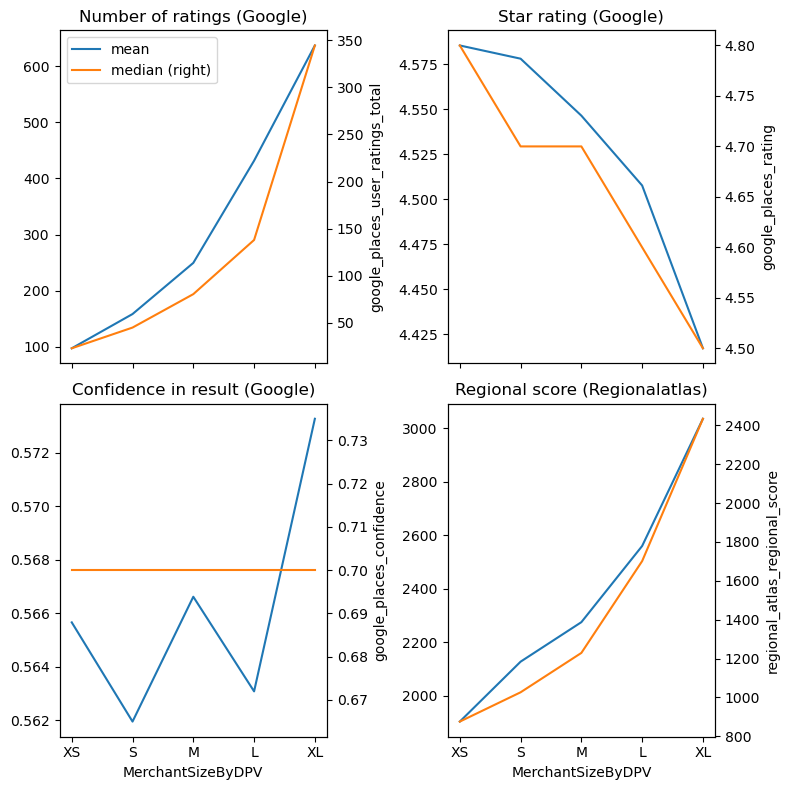

In [27]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(8,8), sharex=True)
df_grouped.plot(kind='line', x='MerchantSizeByDPV', y='google_places_user_ratings_total', legend=True,
                ylabel="google_places_user_ratings_total", title="Number of ratings (Google)", ax=axs[0,0], secondary_y=('google_places_user_ratings_total', 'median'))
df_grouped.plot(kind='line', x='MerchantSizeByDPV', y='google_places_rating', legend=False,
                ylabel="google_places_rating", title="Star rating (Google)", ax=axs[0,1], secondary_y=('google_places_rating', 'median'))
df_grouped.plot(kind='line', x='MerchantSizeByDPV', y='google_places_confidence', legend=False,
                ylabel="google_places_confidence", title="Confidence in result (Google)", ax=axs[1,0], secondary_y=('google_places_confidence', 'median'))
df_grouped.plot(kind='line', x='MerchantSizeByDPV', y='regional_atlas_regional_score', legend=False,
                ylabel="regional_atlas_regional_score", title="Regional score (Regionalatlas)", ax=axs[1,1], secondary_y=('regional_atlas_regional_score', 'median'))
fig.tight_layout()


plt.show()

<Axes: >

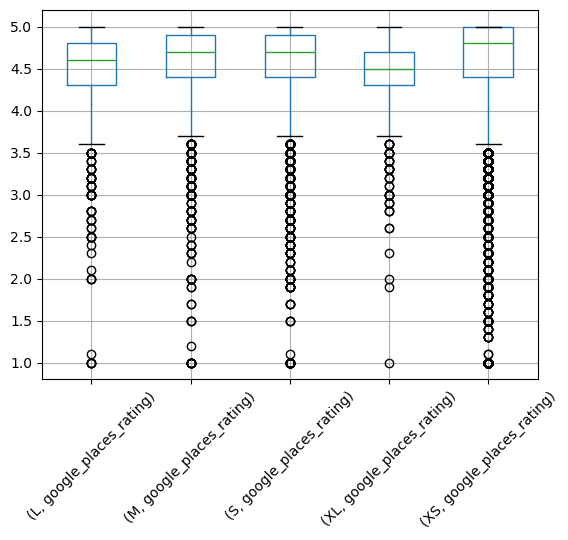

In [28]:
df_grouped_no_agg = df_google.groupby(['MerchantSizeByDPV'])
df_grouped_no_agg[['google_places_rating']].boxplot(subplots=False, rot=45)

<Axes: >

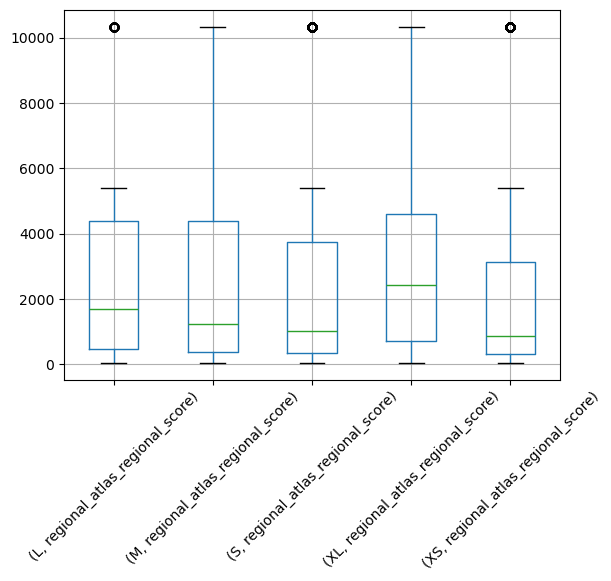

In [29]:
df_grouped_no_agg[['regional_atlas_regional_score']].boxplot(subplots=False, rot=45)

<Axes: >

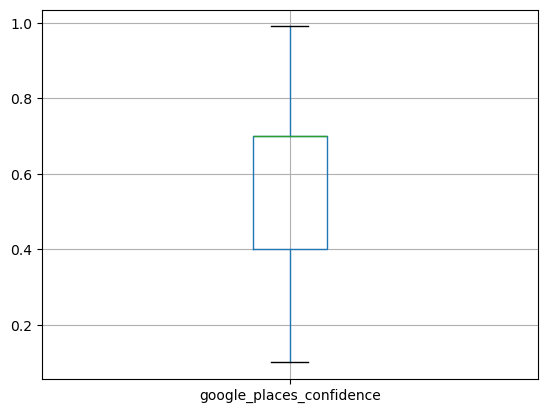

In [30]:
df[['google_places_confidence']].boxplot()

## Geolocation analysis

In [31]:
!pip install plotly
!pip install geopy

In [32]:
from geopy.geocoders import Nominatim
import time
from tqdm import tqdm
import plotly.express as px

SAMPLE_SIZE = 10

In [33]:
geo_df = df.sample(SAMPLE_SIZE)

In [34]:
app = Nominatim(user_agent="test")

In [35]:
def get_location_by_address(address):
    """This function returns a location as [lat, lon] from an address
    will repeat until success"""
    if address is None or address == "":
        return pd.Series([None, None])
    time.sleep(1)
    try:
        return pd.Series([app.geocode(address).raw['lat'], app.geocode(address).raw['lon']])
    except Exception as e:
        print(e)
        return pd.Series([None, None])

In [36]:
tqdm.pandas(desc="Geocoding addresses")
geo_df[["lat", "lon"]] = geo_df.progress_apply(lambda lead: get_location_by_address(lead["google_places_formatted_address"]), axis=1)

Geocoding addresses: 100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


In [37]:
geo_df[['lat', 'lon']]

lat                 lon
79814  49.448587599999996  11.080685285034447
1904          48.02878705   9.505486497164018
67465          48.9589736   9.174611300807989
61721          49.4809375          10.9764458
382    49.128727749999996   9.362474256288255
5549           52.3379379           9.3869088
5052           49.4591119           11.063045
83140          51.3623363          12.3592316
29885          49.4926899           8.4606168
7986           51.4557571   7.018577664972804

In [38]:
fig = px.scatter_geo(geo_df,
                    lat=geo_df.lat,
                    lon=geo_df.lon,
                    hover_name="google_places_formatted_address",
                    hover_data=["google_places_name", "Company Name"],
                    color="regional_atlas_regional_score")
fig.show()

## Mapping google business type to MCC Level

In [39]:
df[['google_places_detailed_type', 'MCC Level']].head(10)

google_places_detailed_type                MCC Level
0  ['doctor', 'health', 'point_of_interest', 'est...         Medical Services
1                                                NaN               Consulting
2  ['restaurant', 'food', 'point_of_interest', 'e...        Café / Restaurant
3  ['meal_delivery', 'restaurant', 'food', 'point...           Food / Grocery
4             ['point_of_interest', 'establishment']              Taxi / Limo
5                                                NaN  Tobacco and eCigarettes
6  ['doctor', 'health', 'point_of_interest', 'est...     Medical Practitioner
7  ['beauty_salon', 'store', 'point_of_interest',...          Beauty / Barber
8             ['point_of_interest', 'establishment']    IT / Tech / Cellphone
9  ['dentist', 'doctor', 'health', 'point_of_inte...              Taxi / Limo

In [40]:
mcc_df = df.dropna(subset=['google_places_detailed_type'])

In [41]:
mcc_map = pd.DataFrame(columns=['google_type', 'mcc_level'])

for index, row in mcc_df.iterrows():
    if row['google_places_detailed_type'] is None or row['MCC Level'] is None:
        continue

    google_types = row['google_places_detailed_type'].strip('][').split(', ')
    mapping = []
    for g_type in google_types:
        mapping.append([g_type.strip('\''), row['MCC Level']])
    mcc_map = pd.concat([pd.DataFrame(mapping, columns=mcc_map.columns), mcc_map], ignore_index=True)

In [42]:
mcc_map.head()

google_type             mcc_level
0             doctor  Medical Practitioner
1  point_of_interest  Medical Practitioner
2             health  Medical Practitioner
3      establishment  Medical Practitioner
4  point_of_interest   Catering / Delivery

In [43]:
mcc_map['value'] = 1
mcc_pivot = pd.pivot_table(mcc_map, values='value',index='google_type', columns='mcc_level', aggfunc='count')
mcc_pivot.head(10)

mcc_level                    Alcohol stores  \
google_type                                   
accounting                              NaN   
administrative_area_level_1             NaN   
administrative_area_level_2             NaN   
administrative_area_level_3             NaN   
administrative_area_level_4             1.0   
administrative_area_level_5             NaN   
airport                                 NaN   
amusement_park                          NaN   
aquarium                                NaN   
art_gallery                             1.0   

mcc_level                    Antique Shops – Sales, Repairs, and Restoration Services  \
google_type                                                                             
accounting                                                                 NaN          
administrative_area_level_1                                                NaN          
administrative_area_level_2                                                NaN          
administrative_area_level_3                                                NaN          
administrative_area_level_4                                                NaN          
administrative_area_level_5                                                NaN          
airport                                                                    NaN          
amusement_park                                                             NaN          
aquarium                                                                   NaN          
art_gallery                                                                NaN          

mcc_level                    Apparel  \
google_type                            
accounting                       1.0   
administrative_area_level_1      NaN   
administrative_area_level_2      NaN   
administrative_area_level_3      NaN   
administrative_area_level_4      NaN   
administrative_area_level_5      NaN   
airport                          NaN   
amusement_park                   1.0   
aquarium                         NaN   
art_gallery                     13.0   

mcc_level                    Architectural – Engineering and Surveying Services  \
google_type                                                                       
accounting                                                                 NaN    
administrative_area_level_1                                                NaN    
administrative_area_level_2                                                NaN    
administrative_area_level_3                                                NaN    
administrative_area_level_4                                                NaN    
administrative_area_level_5                                                NaN    
airport                                                                    NaN    
amusement_park                                                             NaN    
aquarium                                                                   NaN    
art_gallery                                                                NaN    

mcc_level                    Art Dealers and Galleries  \
google_type                                              
accounting                                         3.0   
administrative_area_level_1                        NaN   
administrative_area_level_2                        1.0   
administrative_area_level_3                        NaN   
administrative_area_level_4                        NaN   
administrative_area_level_5                        NaN   
airport                                            NaN   
amusement_park                                     NaN   
aquarium                                           NaN   
art_gallery                                       41.0   

mcc_level                    Artist’s Supply and Craft Shops  Bar / Club  \
google_type                                                                
accounting                             

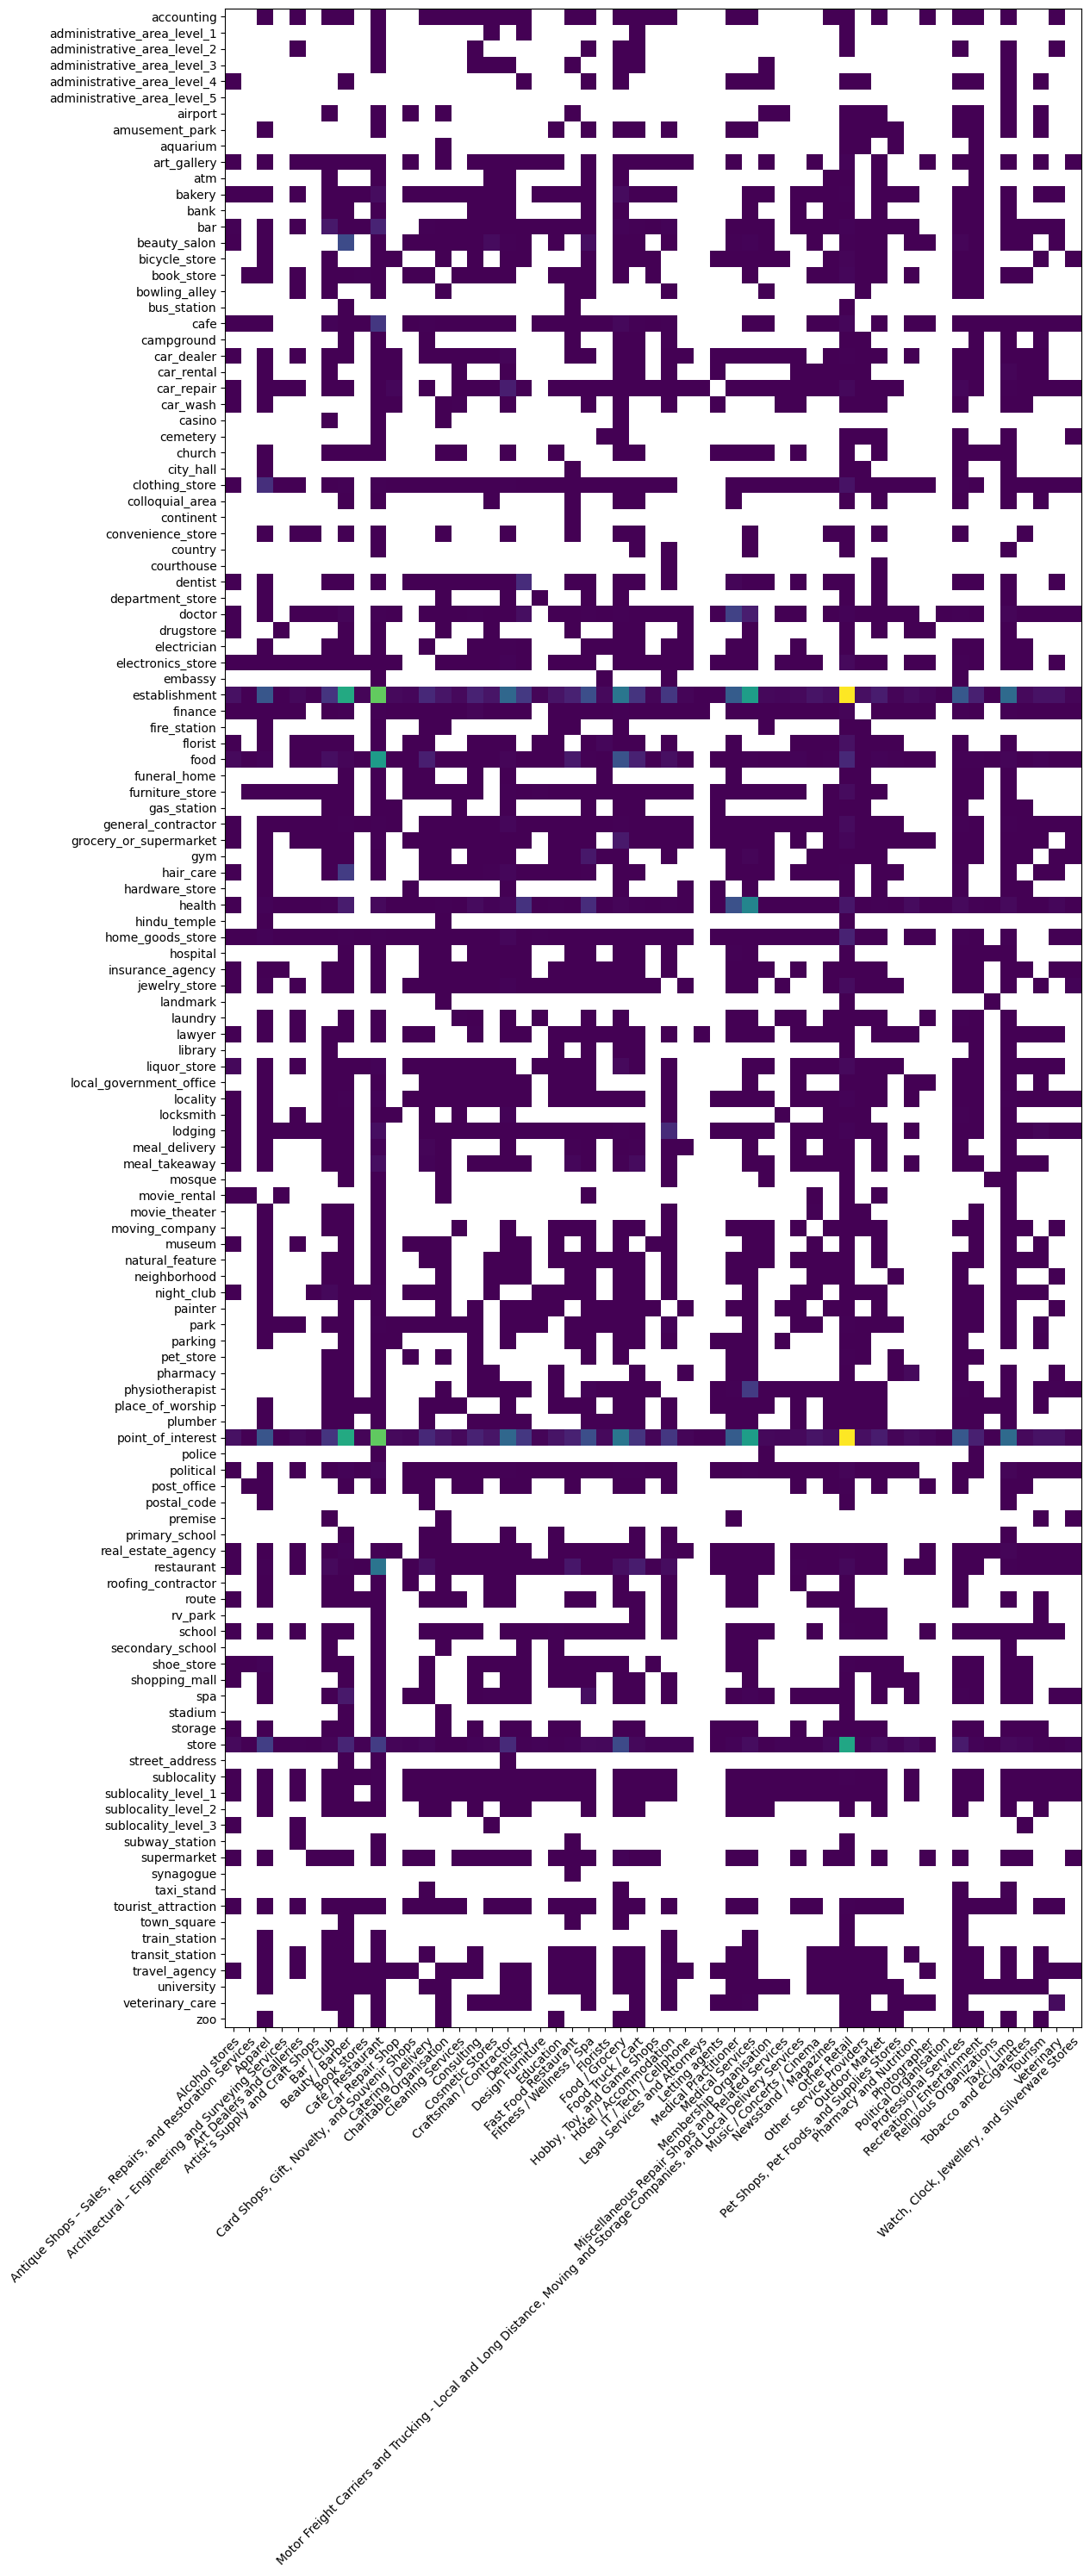

In [44]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,30))
im = ax.imshow(mcc_pivot)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(mcc_pivot.columns)), labels=mcc_pivot.columns)
ax.set_yticks(np.arange(len(mcc_pivot.index)), labels=mcc_pivot.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

In [45]:
## export list of google business types
#business_types = pd.DataFrame(mcc_pivot.index)
#business_types['mcc_level'] = None

#business_types.to_csv('s3://amos-training-data/google_business_types.csv', index=False)